## Week 4. Dataframes and Visualisation

### Recap

Here we can spend up to 30 minutes to discuss difficulties you faced with while completing the Homework Assignment.

### Best data storage?

So far we have learnt 4 different data containers to store multiple values. `set` is good for unique values, and `list` and `tuple` are different by their mutability. `dict` allows us to label the data we collect with key-value pairs. But is it the best way to store and observe data?

Let's try it out on [2012 US presidential election](https://en.wikipedia.org/wiki/2012_United_States_presidential_election) open data *(source: [The Guardian](https://www.theguardian.com/news/datablog/2012/nov/07/us-2012-election-county-results-download))*

In [1]:
# googled solution 1

import csv

myFile = open('../data/us-election-2012-results-by-county.csv', 'r')
reader = csv.DictReader(myFile)
myList = list()
for dictionary in reader:
    myList.append(dictionary)

myList

[{'п»їCounty2012Id': '2',
  'StateCode': 'AK',
  'CountyName': 'Alaska',
  'CountyNumber': '2001',
  'FipsCode': '2000',
  'PrecintsReporting': '437',
  'TotalPrecincts': '438',
  'CountyTotalVotes': '220596',
  'SourceOrder': '1',
  'Party': 'Dem',
  'FirstName': 'Barack',
  'LastName': 'Obama',
  'Votes': '91696'},
 {'п»їCounty2012Id': '4',
  'StateCode': 'AL',
  'CountyName': 'Autauga',
  'CountyNumber': '1001',
  'FipsCode': '1001',
  'PrecintsReporting': '28',
  'TotalPrecincts': '28',
  'CountyTotalVotes': '23909',
  'SourceOrder': '1',
  'Party': 'Dem',
  'FirstName': 'Barack',
  'LastName': 'Obama',
  'Votes': '6354'},
 {'п»їCounty2012Id': '5',
  'StateCode': 'AL',
  'CountyName': 'Baldwin',
  'CountyNumber': '1002',
  'FipsCode': '1003',
  'PrecintsReporting': '55',
  'TotalPrecincts': '55',
  'CountyTotalVotes': '84988',
  'SourceOrder': '1',
  'Party': 'Dem',
  'FirstName': 'Barack',
  'LastName': 'Obama',
  'Votes': '18329'},
 {'п»їCounty2012Id': '6',
  'StateCode': 'AL',
 

In [6]:
len(myList)

23238

In [7]:
# googled solution 2

import csv
reader = csv.reader(open('../data/us-election-2012-results-by-county.csv', 'r'))
d = {}
for row in reader:
   k, v = row
   d[k] = v

ValueError: too many values to unpack (expected 2)

We have identical key-value pairs repeated 23238 times. But is `dict` the best way to display a lot observations of the same structure? Propose your solution!

### Dataframes with pandas 

[Pandas](https://pandas.pydata.org/) is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool. It is a software library written for the Python programming language.

![](../img/pandas.jpg)

In [8]:
import pandas as pd
elections = pd.read_csv("../data/us-election-2012-results-by-county.csv")
elections

,County2012Id,StateCode,CountyName,CountyNumber,FipsCode,PrecintsReporting,TotalPrecincts,CountyTotalVotes,SourceOrder,Party,FirstName,LastName,Votes
0,2,AK,Alaska,2001,2000,437,438,220596,1,Dem,Barack,Obama,91696
1,4,AL,Autauga,1001,1001,28,28,23909,1,Dem,Barack,Obama,6354
2,5,AL,Baldwin,1002,1003,55,55,84988,1,Dem,Barack,Obama,18329
3,6,AL,Barbour,1003,1005,19,19,11459,1,Dem,Barack,Obama,5873
4,7,AL,Bibb,1004,1007,10,10,8391,1,Dem,Barack,Obama,2200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23233,23594,CO,Summit,6059,8117,20,20,15038,16,SEP,Jerry,White,1
23234,23595,CO,Teller,6060,8119,13,13,12144,16,SEP,Jerry,White,1
23235,23596,CO,Washington,6061,8121,6,6,2567,16,SEP,Jerry,White,1
23236,23597,CO,Weld,6062,8123,109,109,112695,16,SEP,Jerry,White,5


In [9]:
len(elections)

23238

In [10]:
type(elections)

pandas.core.frame.DataFrame

In [11]:
emptyDF = pd.DataFrame()  # creates an empty DataFrame object

Why **Pandas**? It's the easiest and the most interpretable tool to work with large-scale datasets no matter of their type:
* cross-sectional data - a collection of different observations and features in a single point of time. Almost 90% of tables you'll meet is cross-sectional ones. 
* time series - one object/observation through time. Mostly popular for temperature forecasts, stocks prices or signals measure (engineering).
* panel data (or cross-sectional time-series data) - different obs. and feat. through time. Mix of previous methods. 

![](../img/datass.png)

### Indexing with pandas dataframe

Just like `dict`, pandas dataframes have 2-Dimensions: rows (also called observations) and columns (features, sometimes variables). Aand just like with `dict`, we can call elements by names - each column has a name, or title - it's always written inside square brackets and allow you to pass **one object only**.

In [12]:
elections['CountyName'] # thats how we can get all CountyNames from our dataframe

0            Alaska
1           Autauga
2           Baldwin
3           Barbour
4              Bibb
            ...    
23233        Summit
23234        Teller
23235    Washington
23236          Weld
23237          Yuma
Name: CountyName, Length: 23238, dtype: object

In [13]:
type(elections['CountyName'])  # a single column has type Series, which is quietly the same

pandas.core.series.Series

In [14]:
elections[['County2012Id', 'CountyName', 'StateCode']]  # to select multiple columns, we need to pass the list with columnNames inside square brackets

,County2012Id,CountyName,StateCode
0,2,Alaska,AK
1,4,Autauga,AL
2,5,Baldwin,AL
3,6,Barbour,AL
4,7,Bibb,AL
...,...,...,...
23233,23594,Summit,CO
23234,23595,Teller,CO
23235,23596,Washington,CO
23236,23597,Weld,CO


In [15]:
type(elections[['County2012Id', 'CountyName', 'StateCode']])  # this will create a mini-dataframe from our original one

pandas.core.frame.DataFrame

What's more interesting: you can filter your dataset with logical expression inside square brackets. 

In [16]:
elections['CountyName'] == "Alaska"  # first step: formulate the rule

0         True
1        False
2        False
3        False
4        False
         ...  
23233    False
23234    False
23235    False
23236    False
23237    False
Name: CountyName, Length: 23238, dtype: bool

In [17]:
elections[elections['CountyName'] == "Alaska"] # second step: select the slice according to your rule

,County2012Id,StateCode,CountyName,CountyNumber,FipsCode,PrecintsReporting,TotalPrecincts,CountyTotalVotes,SourceOrder,Party,FirstName,LastName,Votes
0,2,AK,Alaska,2001,2000,437,438,220596,1,Dem,Barack,Obama,91696
4588,4641,AK,Alaska,2001,2000,437,438,220596,2,GOP,Mitt,Romney,121234
9176,9280,AK,Alaska,2001,2000,437,438,220596,3,Lib,Gary,Johnson,5539
13687,13919,AK,Alaska,2001,2000,437,438,220596,4,Grn,Jill,Stein,2127


In [18]:
# ex. create a subDataFrame for New Your County (NY) only
ny_elections = elections[elections['StateCode'] == "NY"]
ny_elections

,County2012Id,StateCode,CountyName,CountyNumber,FipsCode,PrecintsReporting,TotalPrecincts,CountyTotalVotes,SourceOrder,Party,FirstName,LastName,Votes
634,646,NY,Nassau,33030,36059,1175,1175,460824,1,Dem,Barack,Obama,243649
635,647,NY,Niagara,33032,36063,180,180,82720,1,Dem,Barack,Obama,40862
636,648,NY,Oneida,33033,36065,192,192,80429,1,Dem,Barack,Obama,37388
637,649,NY,Onondaga,33034,36067,433,433,188787,1,Dem,Barack,Obama,112664
638,650,NY,Ontario,33035,36069,92,92,44144,1,Dem,Barack,Obama,21285
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20324,20639,NY,Livingston,33026,36051,61,61,24606,5,CST,Virgil,Goode,42
20325,20640,NY,Madison,33027,36053,55,55,25865,5,CST,Virgil,Goode,52
20326,20641,NY,Manhattan,33031,36061,1133,1164,496293,5,CST,Virgil,Goode,122
20327,20642,NY,Monroe,33028,36055,812,812,308925,5,CST,Virgil,Goode,303


In [19]:
# ex. now leave columns with County Name and Total Votes innit only. save the result
ny_elections = ny_elections[['CountyName', 'CountyTotalVotes']]

In [20]:
# guess how many counties in NY State are?
type(ny_elections)

pandas.core.frame.DataFrame

### DataFrames methods: attributes and functions

We already know that each class in Python might have different methods to operate with data. Let's have a look to `DataFrame` methods:

In [21]:
dir(pd.core.frame.DataFrame) # to get all methods

['T',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__'

Whoa, that's a big list! Actually, `dir(pd.core.frame.DataFrame)` and all other `dir` outputs contains not only method-functions but different essences: 
* attributes to get an access to dataframe's metadata (`shape`, `index`, `columns`, etc) 
* functions to change data and create new dataframes (`drop`, `sort_values`, `groupby`, etc)

>
> According to [Python's glossary](https://stackoverflow.com/a/46312533/10803427):
> 
> attribute: A value associated with an object which is referenced by name using dotted expressions. For example, if an object o has an attribute a it would be referenced as o.a
>
> method: A function which is defined inside a class body. If called as an attribute of an instance of that class, the method will get the instance object as its first argument (which is usually called self). See function and nested scope.
>

Don't worry lads: we won't use all this stuff for coding. Let's run through essentialrones instead.

In [22]:
elections.head(5) # to display first N rows
# ny_elections.tail(5) # to display last N rows

,County2012Id,StateCode,CountyName,CountyNumber,FipsCode,PrecintsReporting,TotalPrecincts,CountyTotalVotes,SourceOrder,Party,FirstName,LastName,Votes
0,2,AK,Alaska,2001,2000,437,438,220596,1,Dem,Barack,Obama,91696
1,4,AL,Autauga,1001,1001,28,28,23909,1,Dem,Barack,Obama,6354
2,5,AL,Baldwin,1002,1003,55,55,84988,1,Dem,Barack,Obama,18329
3,6,AL,Barbour,1003,1005,19,19,11459,1,Dem,Barack,Obama,5873
4,7,AL,Bibb,1004,1007,10,10,8391,1,Dem,Barack,Obama,2200


In [23]:
elections.columns # columns here is not a method, but an attribute. they don't requre brackets. just accept this, no logic here.
# list(ny_elections.columns)

Index(['County2012Id', 'StateCode', 'CountyName', 'CountyNumber', 'FipsCode',
       'PrecintsReporting', 'TotalPrecincts', 'CountyTotalVotes',
       'SourceOrder', 'Party', 'FirstName', 'LastName', 'Votes'],
      dtype='object')

In [24]:
elections.drop(columns=['CountyTotalVotes'])  # to deselect particular columns out from dataframe. parameter columns is neccessary 
elections.drop([0:5]) # this will drop first 5 rows out from DataFrame

SyntaxError: invalid syntax (1402907964.py, line 2)

In [25]:
elections  # remember to save the result of dropping if you want to 

,County2012Id,StateCode,CountyName,CountyNumber,FipsCode,PrecintsReporting,TotalPrecincts,CountyTotalVotes,SourceOrder,Party,FirstName,LastName,Votes
0,2,AK,Alaska,2001,2000,437,438,220596,1,Dem,Barack,Obama,91696
1,4,AL,Autauga,1001,1001,28,28,23909,1,Dem,Barack,Obama,6354
2,5,AL,Baldwin,1002,1003,55,55,84988,1,Dem,Barack,Obama,18329
3,6,AL,Barbour,1003,1005,19,19,11459,1,Dem,Barack,Obama,5873
4,7,AL,Bibb,1004,1007,10,10,8391,1,Dem,Barack,Obama,2200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23233,23594,CO,Summit,6059,8117,20,20,15038,16,SEP,Jerry,White,1
23234,23595,CO,Teller,6060,8119,13,13,12144,16,SEP,Jerry,White,1
23235,23596,CO,Washington,6061,8121,6,6,2567,16,SEP,Jerry,White,1
23236,23597,CO,Weld,6062,8123,109,109,112695,16,SEP,Jerry,White,5


In [26]:
elections[elections['LastName'].isin(["Obama", "Romney"])] # to filter by multiple values in one column
#  try to delete Obama to see what's happened 

,County2012Id,StateCode,CountyName,CountyNumber,FipsCode,PrecintsReporting,TotalPrecincts,CountyTotalVotes,SourceOrder,Party,FirstName,LastName,Votes
0,2,AK,Alaska,2001,2000,437,438,220596,1,Dem,Barack,Obama,91696
1,4,AL,Autauga,1001,1001,28,28,23909,1,Dem,Barack,Obama,6354
2,5,AL,Baldwin,1002,1003,55,55,84988,1,Dem,Barack,Obama,18329
3,6,AL,Barbour,1003,1005,19,19,11459,1,Dem,Barack,Obama,5873
4,7,AL,Bibb,1004,1007,10,10,8391,1,Dem,Barack,Obama,2200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15438,15695,UT,Utah,45025,49049,369,369,161278,1,Dem,Barack,Obama,15791
15439,15696,UT,Wasatch,45026,49051,36,36,9109,1,Dem,Barack,Obama,2097
15440,15697,UT,Washington,45027,49053,100,100,49733,1,Dem,Barack,Obama,7762
15441,15698,UT,Wayne,45028,49055,7,7,1323,1,Dem,Barack,Obama,213


In [27]:
elections['StateCode'].unique() # to get unique values only

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'MT',
       'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'UT', 'VA', 'VT', 'WA',
       'WI', 'ME', 'MI', 'MN', 'MO', 'MS', 'LA', 'MA', 'MD', 'HI', 'IA',
       'ID', 'IL', 'IN', 'KS', 'KY', 'WV', 'WY'], dtype=object)

In [46]:
len(elections['Party'].unique()) # to leave unique values basing on certain column

32

In [29]:
elections.sort_values(by='PrecintsReporting', ascending=False)  # to arrange by some column

,County2012Id,StateCode,CountyName,CountyNumber,FipsCode,PrecintsReporting,TotalPrecincts,CountyTotalVotes,SourceOrder,Party,FirstName,LastName,Votes
176,182,CA,Los Angeles,5019,6037,4993,4993,2427869,1,Dem,Barack,Obama,1672164
19784,20090,CA,Los Angeles,5019,6037,4993,4993,2427869,6,Grn,Jill,Stein,14707
17951,18231,CA,Los Angeles,5019,6037,4993,4993,2427869,5,Lib,Gary,Johnson,23218
13863,14099,CA,Los Angeles,5019,6037,4993,4993,2427869,4,AIP,Thomas,Hoefling,7573
9352,9460,CA,Los Angeles,5019,6037,4993,4993,2427869,3,PFP,Roseanne,Barr,10607
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8375,8468,ME,Hancock Cty Townships,20898,23009,0,1,0,2,GOP,Mitt,Romney,0
5883,5955,MT,Yellowstone,27056,30111,0,51,68561,2,GOP,Mitt,Romney,40421
16096,16357,ME,Upton,20597,23017,0,1,0,4,Grn,Jill,Stein,0
3787,3829,ME,Hancock Cty Townships,20898,23009,0,1,0,1,Dem,Barack,Obama,0


And not methods but index things - you can add new columns just like we did with `dict`, by stating unique columnname in square brackets.

In [30]:
elections['something'] = 42
elections.head(5)
# elections = elections.drop(columns = "something")

,County2012Id,StateCode,CountyName,CountyNumber,FipsCode,PrecintsReporting,TotalPrecincts,CountyTotalVotes,SourceOrder,Party,FirstName,LastName,Votes,something
0,2,AK,Alaska,2001,2000,437,438,220596,1,Dem,Barack,Obama,91696,42
1,4,AL,Autauga,1001,1001,28,28,23909,1,Dem,Barack,Obama,6354,42
2,5,AL,Baldwin,1002,1003,55,55,84988,1,Dem,Barack,Obama,18329,42
3,6,AL,Barbour,1003,1005,19,19,11459,1,Dem,Barack,Obama,5873,42
4,7,AL,Bibb,1004,1007,10,10,8391,1,Dem,Barack,Obama,2200,42


In [31]:
# ex. count how many counties are in NY
len(ny_elections['CountyName'].unique())

62

In [32]:
# resave the dataframe with unique Counties only
ny_elections = ny_elections.drop_duplicates('CountyName') # to leave unique values basing on certain column

In [33]:
# ex. arrange NY votes by total number of votes
ny_elections.sort_values('CountyTotalVotes')

,CountyName,CountyTotalVotes
1871,Hamilton,2655
651,Schuyler,7464
665,Yates,8437
1874,Lewis,9481
650,Schoharie,11943
...,...,...
634,Nassau,460824
1877,Manhattan,496293
644,Queens,507722
655,Suffolk,540653


In [34]:
# ex. display top 10 counties of ny according to total votes
top10_ny = ny_elections.sort_values('CountyTotalVotes', ascending=False).head(10)
top10_ny

,CountyName,CountyTotalVotes
1853,Brooklyn,618035
655,Suffolk,540653
644,Queens,507722
1877,Manhattan,496293
634,Nassau,460824
1865,Erie,386665
1852,Bronx,316047
1878,Monroe,308925
663,Westchester,284731
637,Onondaga,188787


In [35]:
# leave only those row that you know by county name
top10_ny[top10_ny["CountyName"].isin(['Brooklyn', 'Queens', 'Manhattan', 'Bronx'])]

,CountyName,CountyTotalVotes
1853,Brooklyn,618035
644,Queens,507722
1877,Manhattan,496293
1852,Bronx,316047


### Visualisation tools

One of the most important things for all analysts, data scientists and researchers in general is data visualisations. The thing is, people read plots quicker than large scale of numbers, and there is a great variety of different plot types to demonstrate different data structures.

![](../img/plots.png)

*src: [visual-design,net](https://www.visual-design.net/post/choose-the-right-chart)*

Luckly, there is a built-in functionality of visualusation in pandas: `.plot()` method (read about all interesting stuff in [documetnation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html))

<AxesSubplot:xlabel='CountyName'>

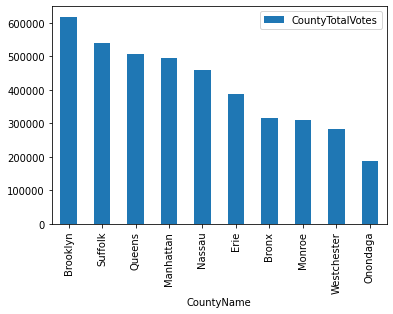

In [36]:
top10_ny.plot(x = "CountyName", y = "CountyTotalVotes", kind = "bar")

In [37]:
# step 1: leave only neccessary data - create a dictionary with state and votes for both candidates
obama_romney = elections[elections['LastName'].isin(["Obama", "Romney"])]
obama_romney = obama_romney[['StateCode', 'LastName', 'Votes']]

# one more method to aggregate columns - for example to calculate sum of votes by states
obama_romney = obama_romney.groupby(['StateCode','LastName'])['Votes'].sum().reset_index()

obama = obama_romney.loc[obama_romney['LastName'] == 'Obama'].drop(columns="LastName").rename(columns={"Votes": "Obama"})
romney = obama_romney.loc[obama_romney['LastName'] == 'Romney'].drop(columns="LastName").rename(columns={"Votes": "Romney"})

votes = pd.merge(obama, romney)

votes.head()

,StateCode,Obama,Romney
0,AK,91696,121234
1,AL,793620,1252453
2,AR,391953,643717
3,AZ,900081,1107130
4,CA,6241648,4046524


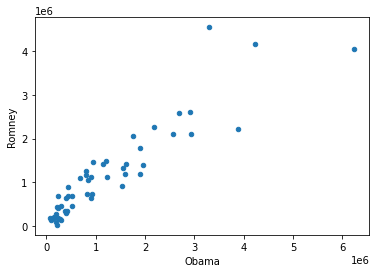

In [38]:
votes.plot(x = "Obama", y = "Romney", kind = "scatter");

### Additional visualisation opportunities

`.plot()` is not so powerful and versatile instrument. There are plenty of additional visualisation packages in Python, and those who know them pretty well can draw very impressive plots. Most popular are `Matplotlib` and `Seaborn`.

In [39]:
import matplotlib.pyplot as plt
import numpy as np

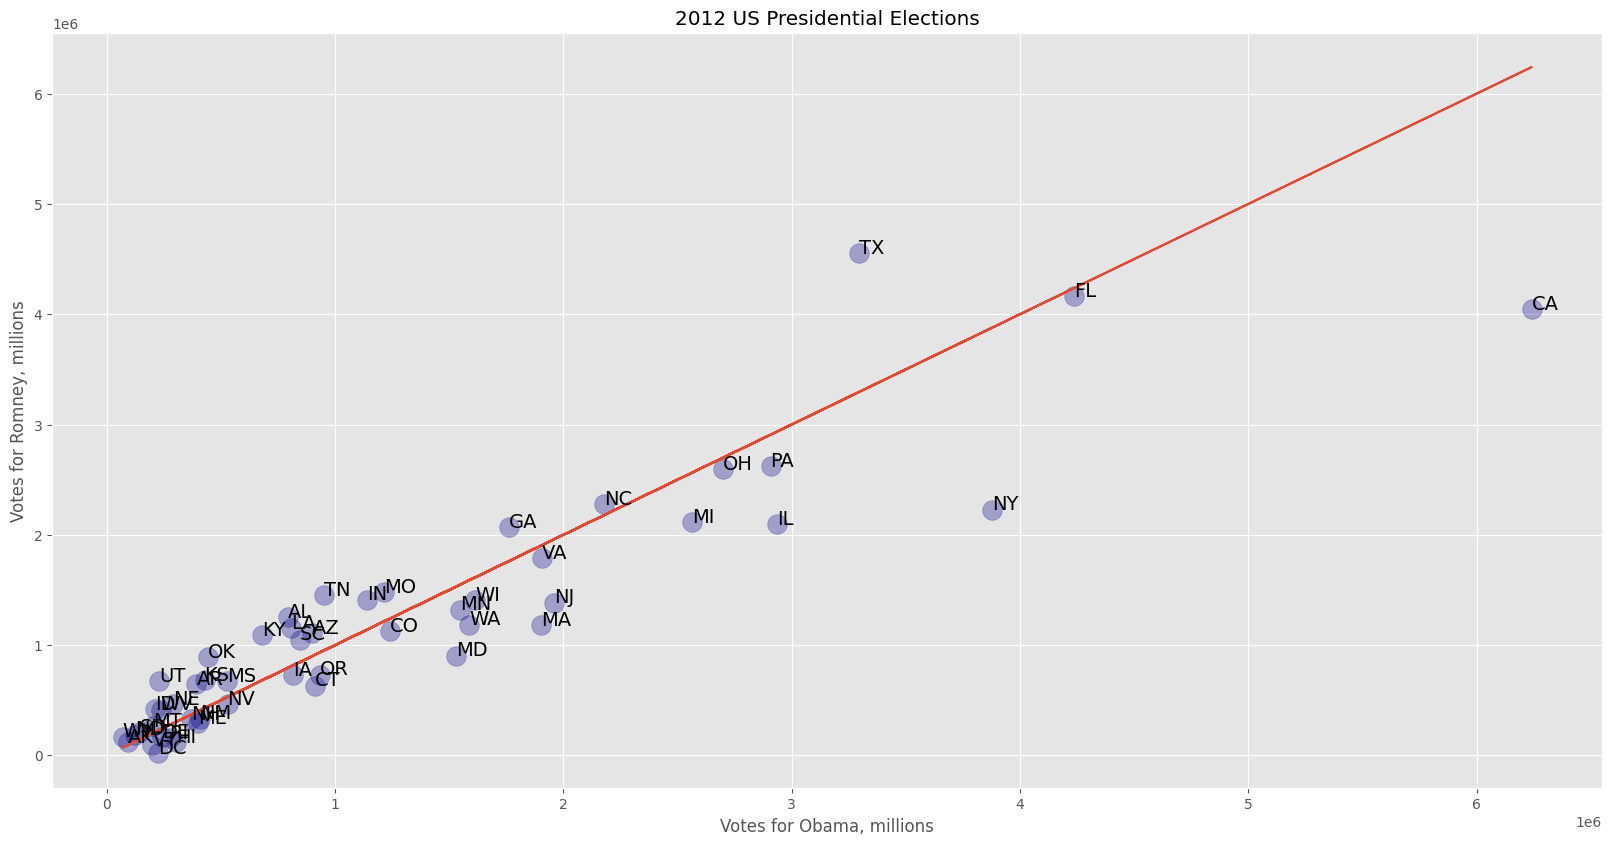

In [40]:
# declaring axes and label vectors
x = votes["Obama"]
y = votes["Romney"]
states = votes["StateCode"]

# setting up size and style
plt.figure(figsize=(20,10), dpi=100)
plt.style.use('ggplot')

# scatterplot
plt.scatter(x, y, marker="o", c="DarkBlue", alpha = 0.3, s = 200)
 
# y=x lineplot
plt.plot(x, x)

# labels
plt.title("2012 US Presidential Elections")
plt.xlabel("Votes for Obama, millions")
plt.ylabel("Votes for Romney, millions")

# point names
for i, txt in enumerate(states):
    plt.annotate(txt, (x[i], y[i]), fontsize=14)

# plt.show();

In [41]:
votes[votes['StateCode'] == "CA"]

,StateCode,Obama,Romney
4,CA,6241648,4046524


In [42]:
# ex. leave only unique counties for California state
california = elections[elections["StateCode"]=="CA"].drop_duplicates("CountyName")
california.head(10)

,County2012Id,StateCode,CountyName,CountyNumber,FipsCode,PrecintsReporting,TotalPrecincts,CountyTotalVotes,SourceOrder,Party,FirstName,LastName,Votes,something
158,164,CA,Alameda,5001,6001,1100,1100,558386,1,Dem,Barack,Obama,438091,42
159,165,CA,Alpine,5002,6003,5,5,647,1,Dem,Barack,Obama,389,42
160,166,CA,Amador,5003,6005,59,59,15303,1,Dem,Barack,Obama,6001,42
161,167,CA,Butte,5004,6007,155,155,70163,1,Dem,Barack,Obama,32567,42
162,168,CA,Calaveras,5005,6009,36,36,18469,1,Dem,Barack,Obama,7404,42
163,169,CA,Colusa,5006,6011,18,18,5865,1,Dem,Barack,Obama,2248,42
164,170,CA,Contra Costa,5007,6013,834,834,351257,1,Dem,Barack,Obama,230826,42
165,171,CA,Del Norte,5008,6015,18,18,7940,1,Dem,Barack,Obama,3396,42
166,172,CA,El Dorado,5009,6017,158,158,85923,1,Dem,Barack,Obama,34033,42
167,173,CA,Fresno,5010,6019,611,611,180244,1,Dem,Barack,Obama,85862,42


In [43]:
# ex. leave top 10 counties by total votes
california = california.sort_values(by="Votes", ascending=False).head(5)
california = california[["CountyName", "TotalPrecincts"]].reset_index(drop=True).set_index('CountyName')

<AxesSubplot:ylabel='TotalPrecincts'>

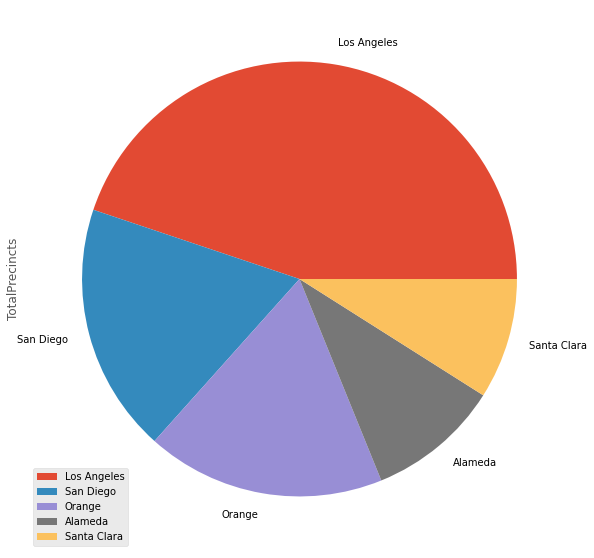

In [44]:
# ex. create a pie chart by state's Total Precincts (you need to leave 2 columns only)
california.plot(y='TotalPrecincts', kind = "pie", figsize=(10,10))

### Homework

The whole thing we discussed today is called EDA - Exploratory Data Analysis. For the homework task, I suggest you to do the same with [dogs dataset]() (description is [here](https://www.kaggle.com/datasets/kmader/dogs-of-zurich)).

1. Load it as Pandas Dataframe;
2. Look at the data (aggregate it, if necessary) and suggest any hypothesis (example: *is there a correlation between city distict and bread's popularity?*);
3. Clean up the data and build a plot to prove or decline your hypothesis.

\* Advanced part of the exercise: make a **cool** graph. You can try to customize `matplotlib` functionality (but it's contrintuitive), or try [`ggplot`](https://monashdatafluency.github.io/python-workshop-base/modules/plotting_with_ggplot/) or [`seaborn`](https://seaborn.pydata.org/tutorial.html). It also should be informative and beautiful - I recommend to seek [https://www.data-to-viz.com/](data-to-viz) for inspiration.